In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_data.loc[iris_data['Species'] == 'Iris-setosa', 'SpeciesN']=0
iris_data.loc[iris_data['Species'] == 'Iris-versicolor', 'SpeciesN']=1
iris_data.loc[iris_data['Species'] == 'Iris-virginica', 'SpeciesN']=2

iris_data["SpeciesN"] = iris_data['SpeciesN'].astype('int32')

In [28]:
X = iris_data[['SepalLengthCm',
               'PetalLengthCm']]

# X = iris_data[['SepalLengthCm',
#                'SepalWidthCm', 
#                'PetalLengthCm',
#                'PetalWidthCm']]

y = iris_data['SpeciesN']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', C=0.5, kernel='linear')
svm.fit(X_train, y_train)

svm.score(X_test, y_test)

print(f"""Тrain: {svm.score(X_train, y_train):.5f}\nТest: {svm.score(X_test, y_test):.5f}""")

Тrain: 0.96667
Тest: 1.00000


In [31]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [32]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5)
cross_val_score(svm, X, y, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([1.        , 0.96666667, 0.8       , 0.96666667, 0.7       ])

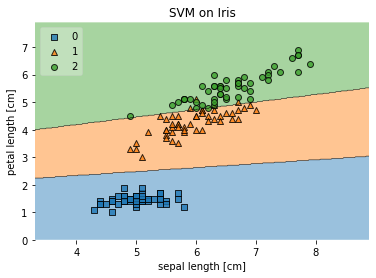

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=svm,
                      legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

Тrain: 0.95833
Тest: 0.96667


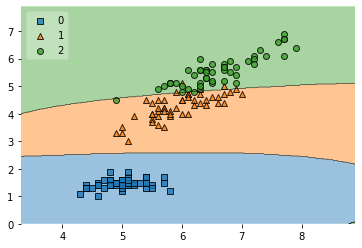

In [10]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

print(f"""Тrain: {svc.score(X_train, y_train):.5f}\nТest: {svc.score(X_test, y_test):.5f}""")

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=svc,
                      legend=2)

Тrain: 0.95833
Тest: 0.96667


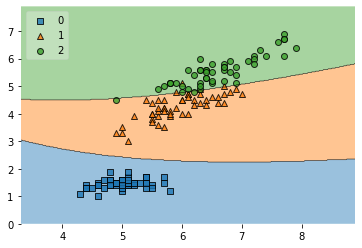

In [128]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

print(f"""Тrain: {svc.score(X_train, y_train):.5f}\nТest: {svc.score(X_test, y_test):.5f}""")

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=svc,
                      legend=2)

Тrain: 0.95000
Тest: 0.96667


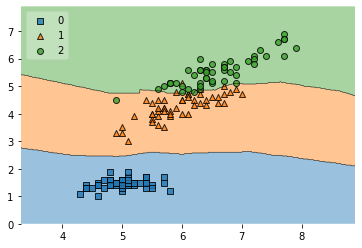

In [15]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)

kn.score(X_test, y_test)

print(f"""Тrain: {kn.score(X_train, y_train):.5f}\nТest: {kn.score(X_test, y_test):.5f}""")

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=kn,
                      legend=2)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = kn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy : ' , acc)
print('Precision Score : ', pre)
print('Recall Score : ', recall)

Accuracy :  0.9666666666666667
Precision Score :  0.9690476190476189
Recall Score :  0.9666666666666667


Тrain: 0.92500
Тest: 0.86667


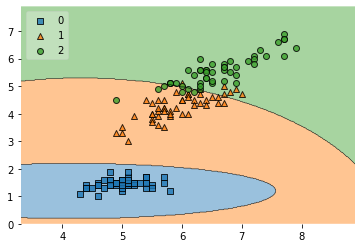

In [131]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb.score(X_test, y_test)

print(f"""Тrain: {nb.score(X_train, y_train):.5f}\nТest: {nb.score(X_test, y_test):.5f}""")

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=nb,
                      legend=2)

Тrain: 0.99167
Тest: 0.96667


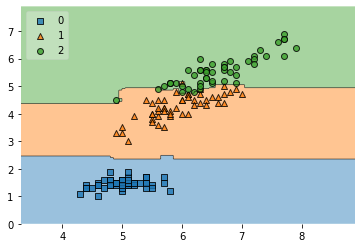

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

print(f"""Тrain: {rf.score(X_train, y_train):.5f}\nТest: {rf.score(X_test, y_test):.5f}""")

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=rf,
                      legend=2)

Тrain: 0.99167
Тest: 1.00000


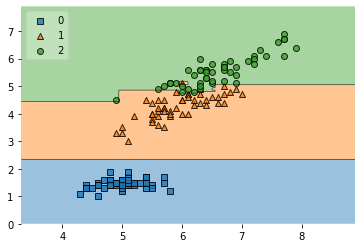

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb.score(X_test, y_test)

print(f"""Тrain: {gb.score(X_train, y_train):.5f}\nТest: {gb.score(X_test, y_test):.5f}""")

plot_decision_regions(X.to_numpy(),
                      y.to_numpy(),
                      clf=gb,
                      legend=2)

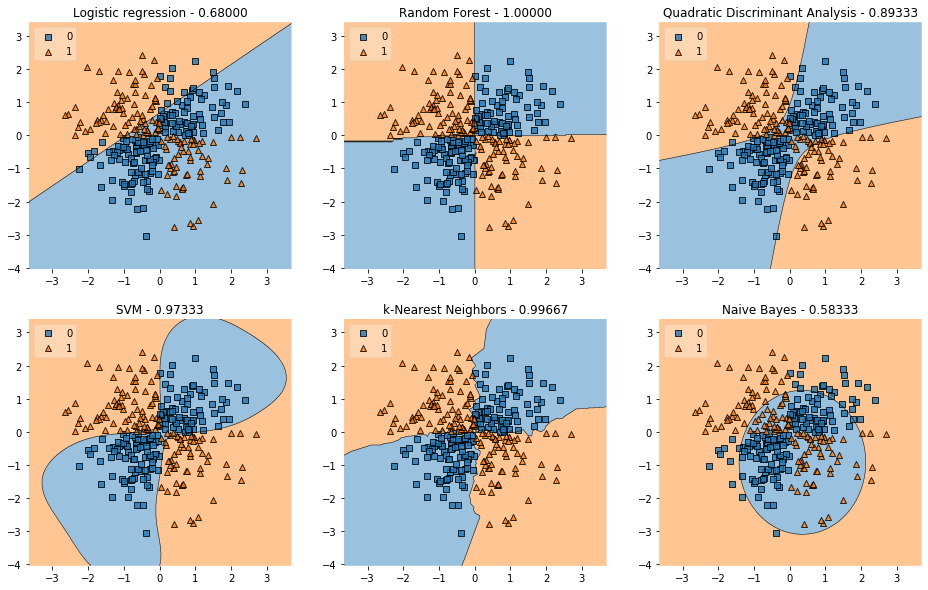

In [174]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import matplotlib.gridspec as gridspec
import itertools

clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = QuadraticDiscriminantAnalysis()
clf4 = SVC(gamma='auto')
clf5 = KNeighborsClassifier(n_neighbors=3)
clf6 = GaussianNB()

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(16,10))

labels = ['Logistic regression', 
          'Random Forest', 
          'Quadratic Discriminant Analysis', 
          'SVM', 
          'k-Nearest Neighbors', 
          'Naive Bayes']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(f'{lab} - {clf.score(X, y):.5f}')

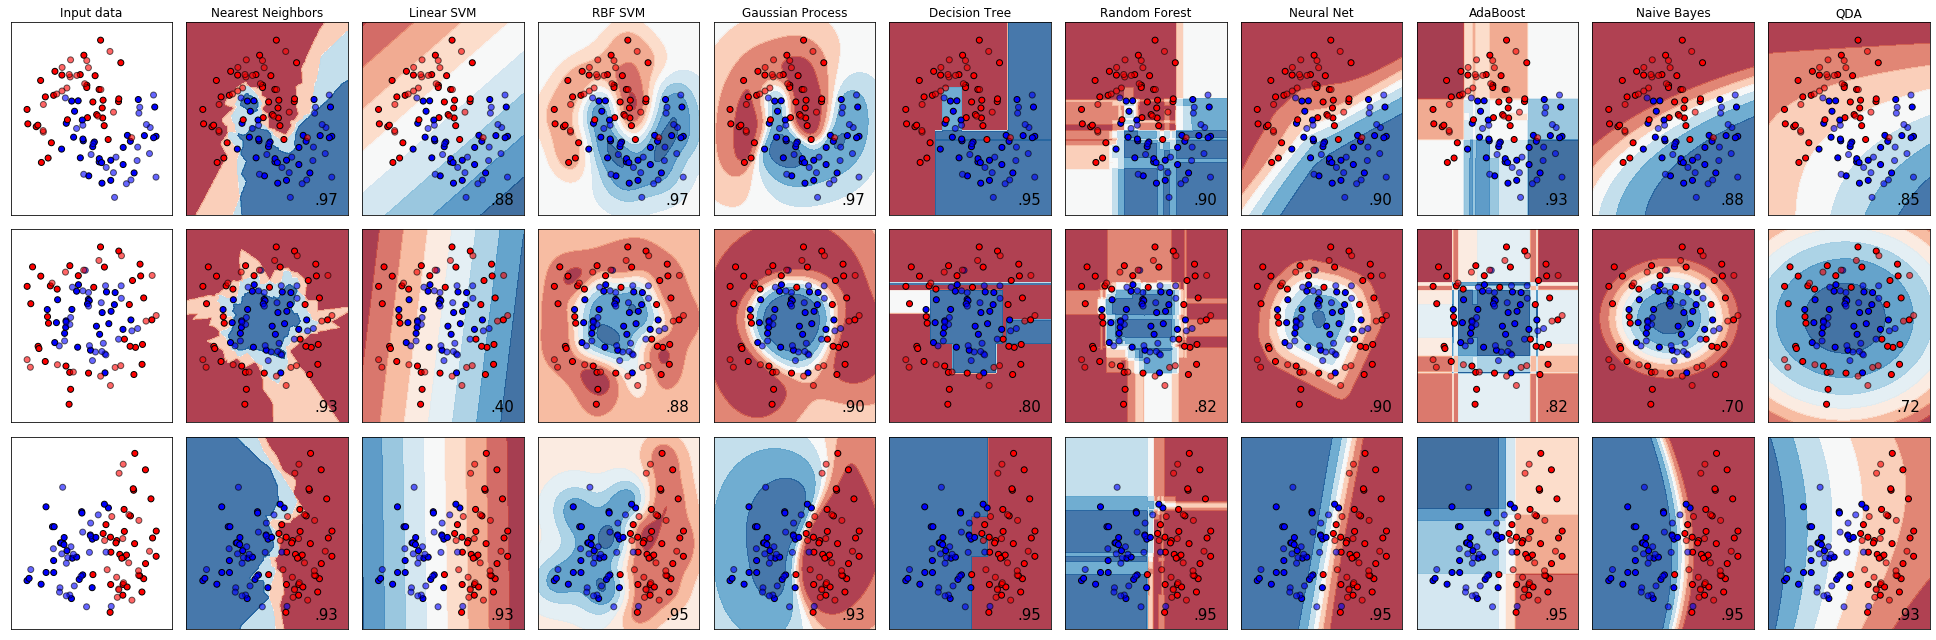

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()